## MLP for MNIST and Fashion-MNIST in PyTorch

In [1]:
import torch

In [2]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [6]:
# generate data
torch.manual_seed(7)
features = torch.randn((1,5))
weights = torch.rand_like(features)
bias = torch.randn((1,1))


In [19]:
# calculate ouput of the 
output = activation(torch.mm(features.view(5,1),weights)+bias)
print(output)

tensor([[0.2815, 0.2839, 0.2768, 0.2794, 0.2688],
        [0.3386, 0.3246, 0.3670, 0.3515, 0.4186],
        [0.3490, 0.3319, 0.3838, 0.3648, 0.4470],
        [0.2289, 0.2451, 0.1993, 0.2150, 0.1548],
        [0.3989, 0.3668, 0.4645, 0.4287, 0.5801]])


In [20]:
# two layer nerual network
torch.manual_seed(7)
# data
features = torch.randn((1,3))
# parameters
n_input = features.shape[1]
n_hidden = 2
n_output = 1
# weights
W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden,n_output)
# bias
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [27]:
layer1 = activation(torch.mm(features,W1) + B1)
layer2 = activation(torch.mm(layer1,W2) + B2) 

In [29]:
# from torch to numpy
import numpy as np    
a = np.random.randn(4,3)
b = torch.from_numpy(a)
print(b)
# memory is shared between a from numpy to b from pytorch

tensor([[-0.4228,  0.4258,  0.1813],
        [ 1.0635, -0.1712,  0.7943],
        [-0.6266, -1.7062,  1.6664],
        [-0.5930,  0.9983, -0.0950]], dtype=torch.float64)


In [30]:
# back to numpy
b.numpy()

array([[-0.42275237,  0.42578316,  0.18130231],
       [ 1.06345758, -0.17116511,  0.79433092],
       [-0.62658456, -1.70618741,  1.66636434],
       [-0.5930056 ,  0.99829097, -0.0950302 ]])

### Using NN Model

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
#import helper
import matplotlib.pyplot as plt
import helper

In [47]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])
trainset = datasets.MNIST('MNIST_data/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

In [50]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))

<class 'torch.Tensor'>


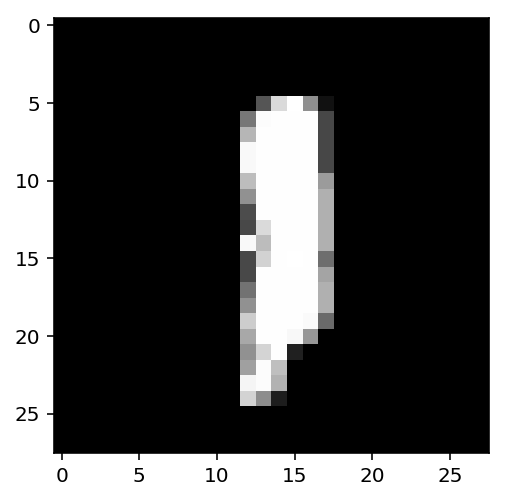

In [56]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [76]:
# two layer nerual network
torch.manual_seed(6)
# data
features = images.view(images.shape[0],-1)
# parameters
n_input = 784
n_hidden = 256
n_output = 10
# weights
W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden,n_output)
# bias
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [77]:
layer1 = activation(torch.mm(features,W1) + B1)
output = activation(torch.mm(layer1,W2) + B2) 

In [102]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [111]:
probs = softmax(output)


## Building Neural Network

In [112]:
from torch import nn

In [117]:
class Network(nn.Module):
    def __init__(self):
        # to add things in network
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    def forward(self,x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x
model = Network()    
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [119]:
# using functional to make code a bit cleaner
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        # to add things in network
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)

    def forward(self,x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x))
        return x
model = Network()    
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
class Network(nn.Module):
    def __init__(self):
        # to add things in network
        super().__init__()
        self.layer1 = nn.Linear(784,256)
        self.layer2 = nn.Linear(256,128)
        self.layer3 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        self.relu = nn.Relue()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    def forward(self,x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x
model = Network() 
model

### Full Neural Network

In [136]:
# Forward pass
model = nn.Sequential(nn.Linear(784,128),nn.ReLU(),
                      nn.Linear(128,64), nn.ReLU(),
                      nn.Linear(64,10), nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
log_ps = model(images)
loss = criterion(log_ps, labels)
print(loss) 

tensor(2.2943, grad_fn=<NllLossBackward>)


In [144]:
# auto grad
x = torch.randn(2,2, requires_grad=True)
x = x**2
print(x.grad_fn)

In [146]:
print(model[0].weight)

Parameter containing:
tensor([[ 0.0313,  0.0038,  0.0299,  ...,  0.0257, -0.0107, -0.0296],
        [-0.0313,  0.0010, -0.0179,  ...,  0.0066,  0.0191,  0.0353],
        [ 0.0005, -0.0006,  0.0337,  ..., -0.0222, -0.0147,  0.0339],
        ...,
        [ 0.0157,  0.0107,  0.0022,  ...,  0.0256, -0.0137,  0.0217],
        [-0.0057, -0.0039, -0.0041,  ...,  0.0318,  0.0300,  0.0189],
        [-0.0135, -0.0235, -0.0196,  ..., -0.0283,  0.0073, -0.0145]],
       requires_grad=True)


In [154]:
# backward pass
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)
for i in range(10):
    images, label = next(iter(trainloader))
    images.resize_(64,784)
    # clear gradient to clear gradient from perevious step
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimzer.step()
    print(loss)


tensor(2.2569, grad_fn=<NllLossBackward>)
tensor(2.2518, grad_fn=<NllLossBackward>)
tensor(2.2550, grad_fn=<NllLossBackward>)
tensor(2.2539, grad_fn=<NllLossBackward>)
tensor(2.2600, grad_fn=<NllLossBackward>)
tensor(2.2497, grad_fn=<NllLossBackward>)
tensor(2.2532, grad_fn=<NllLossBackward>)
tensor(2.2523, grad_fn=<NllLossBackward>)
tensor(2.2485, grad_fn=<NllLossBackward>)
tensor(2.2595, grad_fn=<NllLossBackward>)


### Full Network

In [167]:
from tqdm import tqdm
# Forward pass

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)
epochs = 5
for e in (range(epochs)):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss:", running_loss/len(trainloader))

Training Loss: 1.8567902028941905
Training Loss: 0.7820108346085051
Training Loss: 0.49834396672655523
Training Loss: 0.4175991165930274
Training Loss: 0.378474054544338


In [168]:
%matplotlib inline
import helper

In [173]:
img = images[0].view(1,784)
# turned off gradients to speed up
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
print(np.argmax(ps), labels[0])
#helper.view_classify(img.view(1,28,28),ps)

tensor(3) tensor(3)


### Classify Fashion-MNIST

In [178]:
transform = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])
trainset = datasets.FashionMNIST('FashionMNIST_data/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

Processing...
Done!


In [179]:
dataiter = iter(trainloader)

In [185]:
# Forward pass

model = nn.Sequential(nn.Linear(784,512),
                      nn.ReLU(),
                      nn.Linear(512,256),
                      nn.ReLU(),
                       nn.Linear(256,128),
                      nn.ReLU(),
                       nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)
epochs = 5
for e in (range(epochs)):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss:", running_loss/len(trainloader))



 57%|██████████████████████▊                 | 536/938 [00:23<00:07, 51.63it/s]

Training Loss: 2.281942602159626
Training Loss: 2.0663592182496973
Training Loss: 1.2539897502612458
Training Loss: 0.8279068406456823
Training Loss: 0.7110766319196615


In [190]:
img = images[1].view(1,784)
# turned off gradients to speed up
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
print(np.argmax(ps), labels[1])
#helper.view_classify(img.view(1,28,28),ps)

tensor(5) tensor(5)


## A better Network for Fashion-MNIST Dataset

In [191]:
from torch import nn, optim
import torch.nn.functional as F

#### Network Archtecture

In [199]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

## Training

In [256]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [260]:
# Train
train_loss = []
test_loss = []
epcohs = 5
for e in range(epochs):
    i=0
    running_loss = 0
    for images, labels in trainloader:
        logps = model(images)
        loss = criterion(logps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        i+=1
    train_loss.append(running_accuracy/i)
    # validation loss    
    running_accuracy = 0
    i = 0
    with torch.no_grad():
        for images, labels in testloader:
            logps = model(images)
            testl = criterion(logps,labels)
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1,dim=1)
            # compare labels with top_class
            equals = top_class == labels.view(*top_class.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor))
            mean_accuracy = accuracy.item()*100
            running_accuracy +=mean_accuracy
            i+=1     
    test_loss.append(testl/i)
 
    print(f"Training Loss:", running_loss,running_accuracy/i)
        

Training Loss: 411.6995525434613 19.441297974413647
Training Loss: 396.73568891733885 19.5295842217484
Training Loss: 409.81892819702625 20.948827292110874
Training Loss: 391.54552705585957 21.288646055437102
Training Loss: 385.81318962574005 20.772254797441363


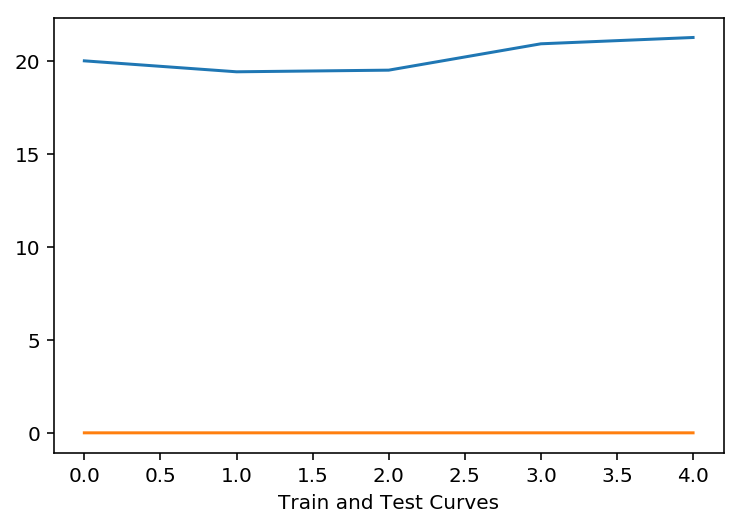

In [261]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Train and Test Curves")


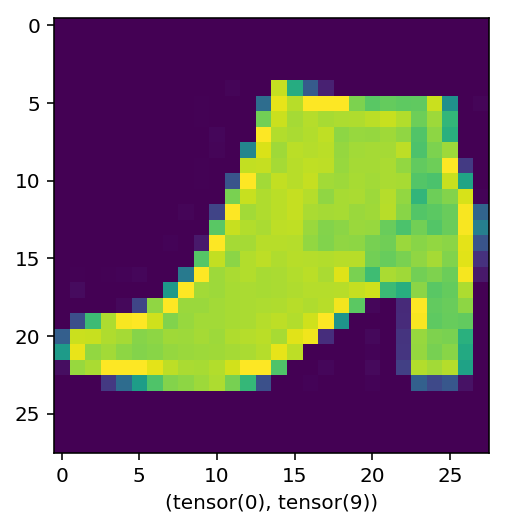

In [262]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
img =  images[1]
ps = torch.exp(model(img))

plt.imshow(img.view(28,28))
plt.xlabel((np.argmax(ps), labels[1]))

### Inference and Validation

In [212]:
transform = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])
trainset = datasets.FashionMNIST('FashionMNIST_data/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('FashionMNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

torch.Size([64, 10])


In [247]:
running_accuracy = 0
i = 0
with torch.no_grad():
    for images, labels in testloader:
        model = Classifier()
        ps = torch.exp(model(images))
        top_p, top_class = ps.topk(1,dim=1)
        # compare labels with top_class
        equals = top_class == labels.view(*top_class.shape)
        accuracy = torch.mean(equals.type(torch.FloatTensor))
        mean_accuracy = accuracy.item()*100
        running_accuracy +=mean_accuracy
        i+=1
print(running_accuracy/i)        

10.167910447761194


## Regulrization

In [266]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(p=0.2)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

# Training

In [267]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [268]:
# Train
train_loss = []
test_loss = []
epcohs = 5
for e in range(epochs):
    running_loss = 0
    model.train()
    for images, labels in trainloader:
        logps = model(images)
        loss = criterion(logps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_accuracy)
    # validation loss    
    running_accuracy = 0
    i = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            logps = model(images)
            testl = criterion(logps,labels)
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1,dim=1)
            # compare labels with top_class
            equals = top_class == labels.view(*top_class.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor))
            mean_accuracy = accuracy.item()*100
            running_accuracy +=mean_accuracy
            i+=1     
    test_loss.append(testl)
 
    print(f"Training Loss:", running_loss,running_accuracy/i)
        

Training Loss: 569.7825503796339 84.10347814498934
Training Loss: 449.900555819273 85.13792643923242
Training Loss: 419.8720242679119 85.61267324093816
Training Loss: 408.2080770879984 87.57995735607676
Training Loss: 393.4502895101905 87.9047841151386


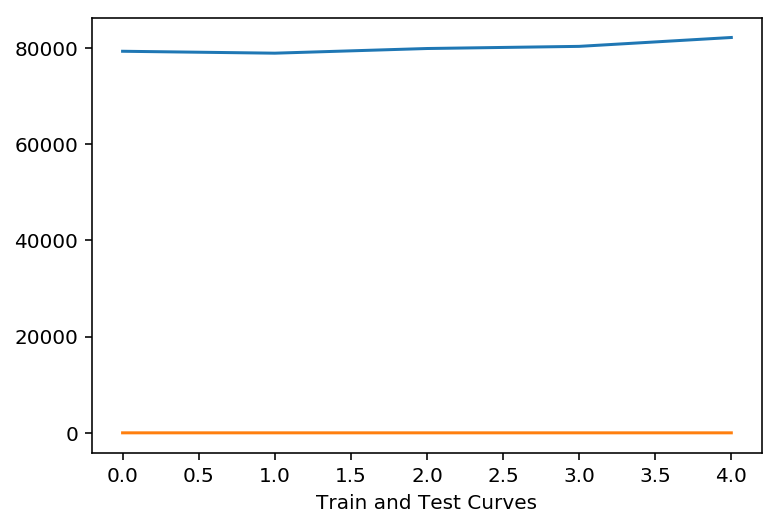

In [269]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Train and Test Curves")


### Save and Load Model

In [271]:
print(model)
print(model.state_dict().keys())

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [272]:
torch.save(model.state_dict(),'checkpoint.pth')

In [274]:
state_dict = torch.load('checkpoint.pth')

In [276]:
# make model and load saved weights in it
model.load_state_dict(state_dict)